# Cross-Validation
In most real-word applications we do not know the data universe, i.e. we do not know all possible data points that might be there. Our training data is possibly just a biased subsample of the population.<br>
When we fit our algorithm to such a subsample its performance will degrade, when applied to new, unseen data points. In order to have an idea, how well our algorithm will perform in such cases, we can use a cross-validation scheme:<br>
In the example below, a 5-fold cross-validation is illustrated.
* split the training data in 5 equal sized parts. In sklearn you can choose StratifiedKFold, what essentially tries to keep the percentage of all classes within the folds.
* train your algorithmm on 4 folds and classify data in the 5th hold-out fold. Keep the performance on this fold.
* repeat the last step 4 more times and use each time another fold as your hold-out fold.
* at the end, you have 5 independent estimates of your algorithm's performance
* compute the mean of theses 5 estimates for an overall estimate

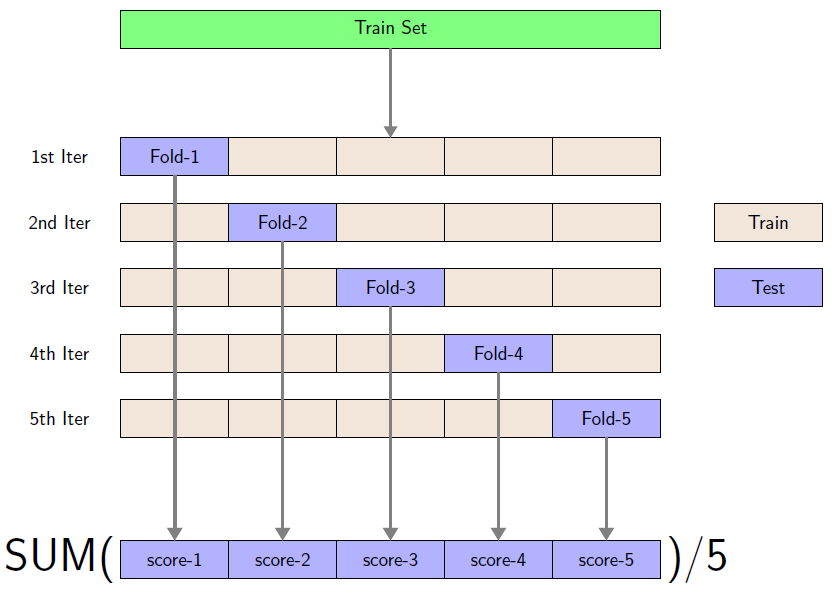

In [1]:
from IPython import display
display.Image('../images/cross_validation.png')

<img alt="generated with latex" caption="The gradient boosting algorithm" id="gradient_boosting" src="cross_validation.png">

### example in python:

# this is pseudo-code...algorithm and data are not defined here

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score

five_fold = StratifiedKFold(y=y_train, n_folds=5, shuffle=True)

auc_scores = []
for train_idx, val_idx in five_fold: 
    algorithm.fit(X_train[train_idx], y_train[train_idx])
    prediction = algorithm.predict(X_train[val_idx])
    auc_scores.append(roc_auc_score(y_true = y_train[val_idx], y_score = prediction))
    
print(f'mean area under the curve: {np.mean(auc_scores)}')    

# Nested cross-validation
We learned how to estimate the true performance of an algorithm. Now, suppose we have to find the best parameters for an algorithm. We use a grid search and use for each setting the cross-validation scheme as described. We then use the best parameter combination and report the estimate of the true performance on unseen data.<br>
Here, we introduce a bias, because we do an extensive search over different settings and in the end get the parameters with best cross-validation result on the training data. In other words, we probably fitted to peciuliarities of the training data. The right way to do it is to use the trainings-folds as well for the parameter search. We then evaluate on the hold-out fold only once. This is called nested cross-validation because the cross-validation scheme for finding the best parameters is nested within our cross-validation that aims to get a unbiased estimate of the algorithm's performance:

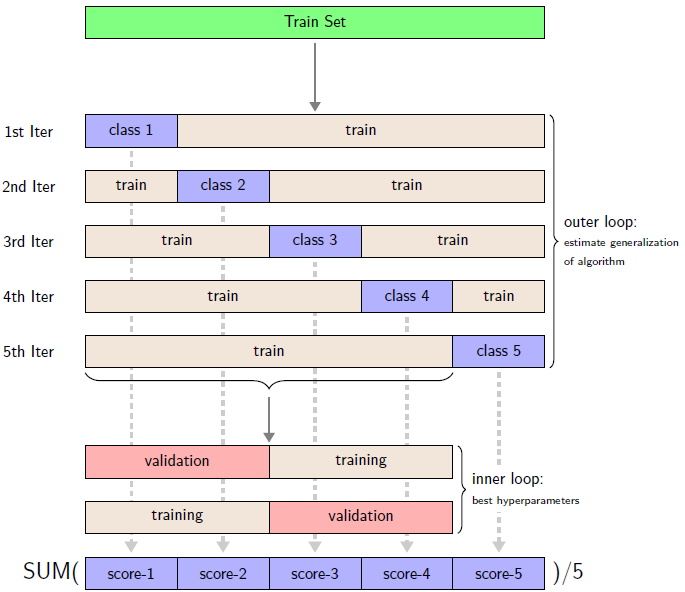

In [2]:
display.Image('../images/nested_cross_validation.png')
# <img alt="generated with latex" caption="The gradient boosting algorithm" id="gradient_boosting" src="../images/nested_cross_validation.png">

# Stacking
Stacking is a technique that is related to cross-validation methods. It became very famous for kaggle competitions. Now, it is exhaustively used in every competition.<br>
Imagine, you think of using the output of one algorithm as an input to just another algorithm. If you fit the first algorithm to all the trainings data, the algorithm will certainly overfit. The generalization to unseen test data or to productive data will be bad. But, as we learned, we can mitigate these problems by the use of a cross-validation scheme. Stacking uses cross-validation for scoring the trainings data and algorithm ensembling for the test data. The important thing here to remember is, that the scores in the training data are __independent__. __The part of the training data scored in each iteration is not part of the data used to fit the algorithm__.

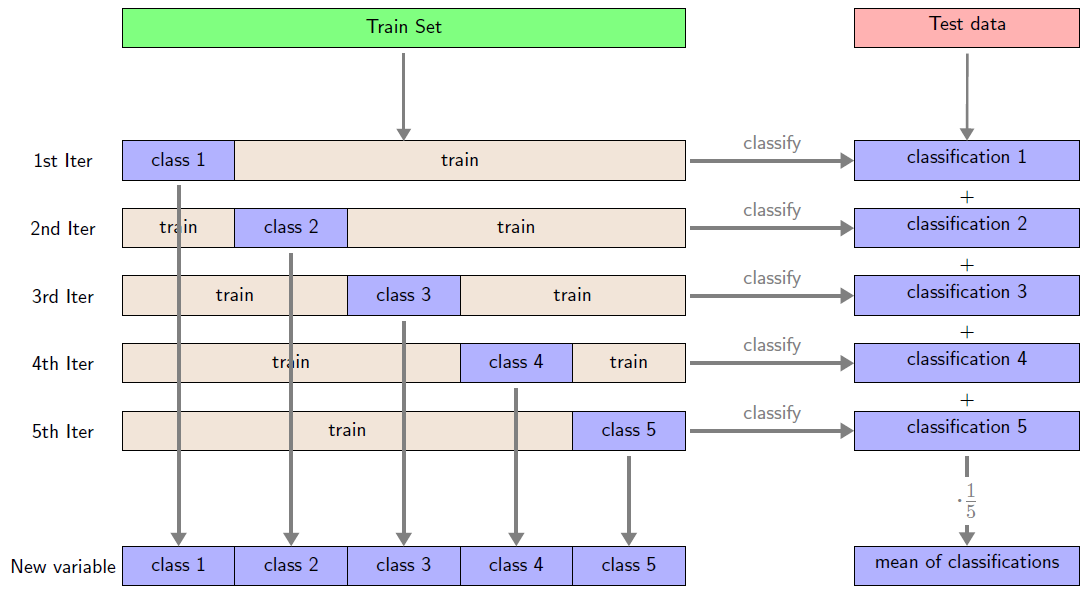

In [4]:
display.Image('../images/stacking.png')
# <img alt="generated with latex" caption="The gradient boosting algorithm" id="gradient_boosting" src="../images/stacking.png">

### mean-encoding or target encoding: only for classification
Mean-encoding was first introduced by [catboost](https://catboost.ai/) from Yandex. It works best with categorical features. The most cited example is the [amazon](https://www.kaggle.com/c/amazon-employee-access-challenge) dataset challenge that consists only of categorical variables.<br>
The idea is to count the times a certain category level is associated with a positive target and compute the mean:

In [2]:
import pandas as pd
from IPython.display import display, display_html

df = pd.DataFrame(dict(category = ['A', 'A', 'A', 'A', 'A',
                                'A', 'B', 'B', 'B', 'C',
                                'C', 'C', 'C'],
                         y = [ 1, 0, 1, 0, 1,
                                 1, 0, 0, 0, 1,
                                 1, 1, 0]
                  ))
df1 = df
df2 = df.iloc[0:4,:]
df2 = pd.DataFrame(dict(category = ['A', 'B', 'C'], mean_encoded = [0.66, 0, 0.75]))
df1_styler = df1.style.set_table_attributes("style='display:inline'")\
.set_caption('Caption table 1').set_table_styles(dict(
    selector="th", props=[("font-size", "150%"),
                          ("text-align", "center")])
                                                )
                                                 
df2_styler = df2.style.set_table_attributes("style='display:inline'").set_caption('Caption table 2')

#df1_styler.style.set_properties({'margin:10px'})
display_html(df1_styler._repr_html_() + ' ' + df2_styler._repr_html_(), raw=True)

,category,y
0,A,1
1,A,0
2,A,1
3,A,0
4,A,1
5,A,1
6,B,0
7,B,0
8,B,0
9,C,1


For the category level __A__ we have:<br>

$\frac{\left(1 + 0 + 1 + 0 + 1 + 1\right)}{6} = 0.666$

For the category level __B__ we have:<br>

$\frac{\left(1 + 1 + 1 + 0\right)}{4} = 0.75$